In [4]:
import numpy as np
import matplotlib.pyplot as plt

# files must be in the working directory
X = np.load("X_modified.npy")   # shape (1000, 28, 28)
y = np.load("y_true.npy")       # shape (1000,)
X = X.astype(np.float32)

print("X shape:", X.shape, "| y shape:", y.shape, "| dtype:", X.dtype)


X shape: (1000, 28, 28) | y shape: (1000,) | dtype: float32


Labels present: [1, 4, 7, 9]


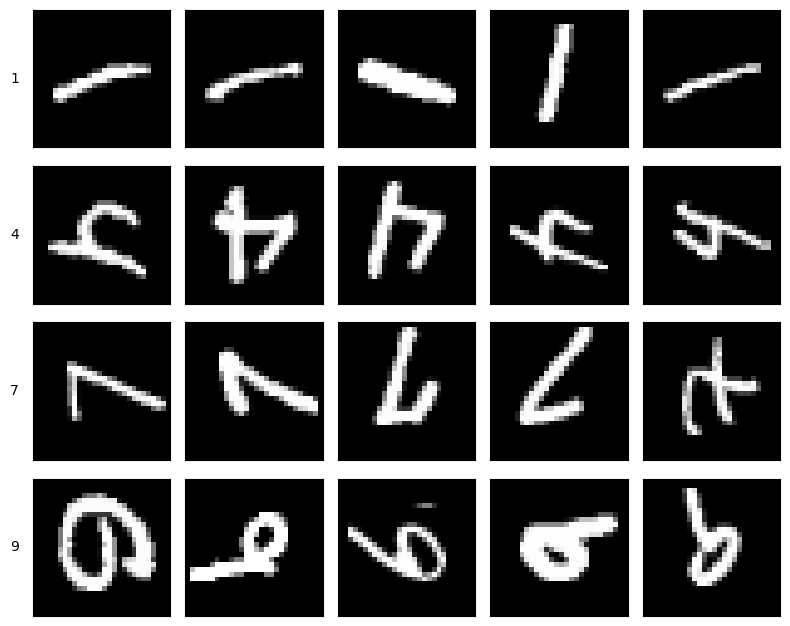

In [10]:
def show_samples_per_label_simple(X, y,  seed=0):
    rng = np.random.default_rng(seed)
    labels = sorted(np.unique(y).tolist())  
    print("Labels present:", labels)

    fig, axes = plt.subplots(len(labels),5, figsize=(1.6*5, 1.6*len(labels)))

    for i, lab in enumerate(labels):
        idx = np.where(y == lab)[0]
        rng.shuffle(idx)
        picks = idx[:5]  

        for j in range(5):
            ax = axes[i, j]
            if j < len(picks):
                ax.imshow(X[picks[j]], cmap='gray')
                ax.set_xticks([]); ax.set_yticks([])
                if j == 0:
                    ax.set_ylabel(int(lab), rotation=0, labelpad=10, va='center', ha='right', fontsize=10)
            else:
                ax.axis('off')

    plt.tight_layout()
    plt.show()

# call it
show_samples_per_label_simple(X, y,  seed=0)


Incomplete class coverage: only four digits are present (1, 4, 7, 9); the remaining classes (0, 2, 3, 5, 6, 8) are absent.

Random rotations: many digits are rotated by multiples of 90° (≈90°, 180°, 270°), breaking the upright orientation seen in the original MNIST. Visual, label-wise grids clearly show rotated instances within each of the four classes.

the reduced class set changes cluster structure (fewer natural groups), and the strong rotations inflate intra-class variability, making unsupervised grouping on raw images substantially harder.

Method :

Pick ink pixels: take all (row, col) positions where pixel value > 0.1 → a 2D point cloud of the digit.

Find main axis (PCA): run PCA on these coordinates; the first component is the digit’s dominant stroke direction.

Compute angle: get the angle of this axis. Target = vertical (≈90° from the x-axis).

Rotate to upright: rotate the image by (angle − 90°) around the digit’s center (OpenCV affine).
If, after rotation, the bottom half has more mass than the top, flip by 180° (simple upright check).

Why this is suitable:

Directly counters the dataset’s random rotations (works for 0°, 90°, 180°, 270°, and slants like ~45°).

Builds a canonical upright form for each digit without using labels.

Removes rotation as a factor while preserving the digit’s stroke shape.